In [73]:
import pandas as pd

train_df = pd.read_csv('IDRID/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')

In [74]:
train_df.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
test_df = pd.read_csv('IDRID/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv')

In [76]:
test_df.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,4,0
1,IDRiD_002,4,1
2,IDRiD_003,4,0
3,IDRiD_004,4,0
4,IDRiD_005,4,1


2    136
0    134
3     74
4     49
1     20
Name: Retinopathy grade, dtype: int64

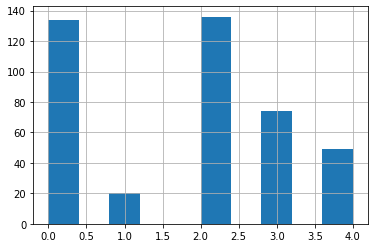

In [43]:
train_df['Retinopathy grade'].hist()
train_df['Retinopathy grade'].value_counts()

0    34
2    32
3    19
4    13
1     5
Name: Retinopathy grade, dtype: int64

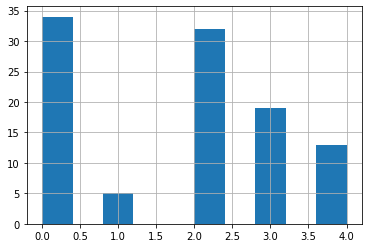

In [44]:
test_df['Retinopathy grade'].hist()
test_df['Retinopathy grade'].value_counts()

In [13]:
def crop_image_from_gray(img, tol=7):
    """
    Applies masks to the orignal image and 
    returns the a preprocessed image with 
    3 channels
    
    :param img: A NumPy Array that will be cropped
    :param tol: The tolerance used for masking
    
    :return: A NumPy array containing the cropped image
    """
    # If for some reason we only have two channels
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    # If we have a normal RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

In [12]:
def resize(image_pil, width, height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [20]:
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('IDRID/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg')
image = crop_image_from_gray(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pilimage =Image.fromarray(image)
image =resize(pilimage,224,224)
#image.save(DIR2+'/'+image_id+'.png')

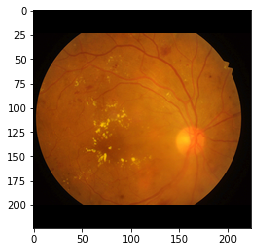

In [23]:
from matplotlib import pyplot as plt
plt.imshow(image)

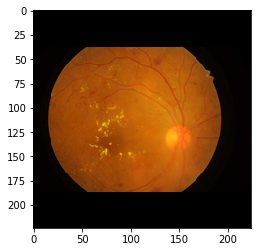

In [25]:
img = Image.open('IDRID/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg')
img= resize(img,224,224) 
plt.imshow(img)

In [64]:
train_df = pd.read_csv('aptos2019-blindness-detection/train.csv')

In [65]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [36]:
from tqdm import tqdm
import os

DIR = 'aptos2019-blindness-detection/train_images'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'aptos2019-blindness-detection/train-224' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 224  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    img = cv2.imread(DIR+'/'+image_id+'.png')
    image = crop_image_from_gray(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pilimage =Image.fromarray(image)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id+'.png')

100%|██████████| 3662/3662 [55:49<00:00,  1.09it/s]  


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

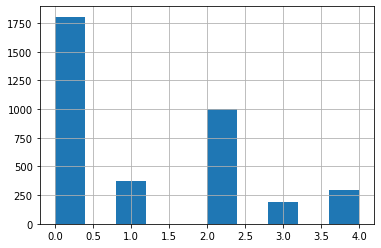

In [37]:
train_df['diagnosis'].hist()
train_df['diagnosis'].value_counts()

In [57]:
image = cv2.imread('aptos2019-blindness-detection/train-224/000c1434d8d7.png')

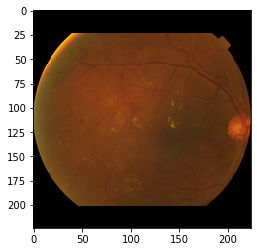

In [58]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [62]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [66]:
IMG_SIZE= 224


DIR = 'aptos2019-blindness-detection/train-224' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises
x = np.zeros((3662, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)

# 

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    image = cv2.imread(f'aptos2019-blindness-detection/train-224/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x[i,:,:,:] = image


100%|██████████| 3662/3662 [00:26<00:00, 136.19it/s]


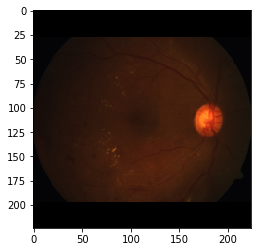

In [71]:
plt.imshow(x[3661])

In [72]:
from numpy import asarray
from numpy import save

data1 = asarray(x)
save('aptos2019-blindness-detection/xaptos.npy', data1)

In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
Image name                413 non-null object
Retinopathy grade         413 non-null int64
Risk of macular edema     413 non-null int64
Unnamed: 3                0 non-null float64
Unnamed: 4                0 non-null float64
Unnamed: 5                0 non-null float64
Unnamed: 6                0 non-null float64
Unnamed: 7                0 non-null float64
Unnamed: 8                0 non-null float64
Unnamed: 9                0 non-null float64
Unnamed: 10               0 non-null float64
Unnamed: 11               1 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 38.8+ KB


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Image name                103 non-null object
Retinopathy grade         103 non-null int64
Risk of macular edema     103 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [78]:
IMG_SIZE= 224


DIR = 'IDRID/B. Disease Grading/1. Original Images/trainning-224' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises
xtrain = np.zeros((413, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(train_df['Image name'])):
    image = cv2.imread(f'IDRID/B. Disease Grading/1. Original Images/trainning-224/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtrain[i,:,:,:] = image

100%|██████████| 413/413 [00:03<00:00, 108.88it/s]


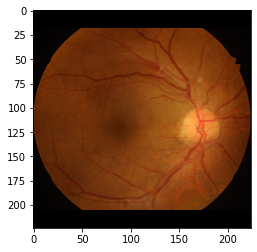

In [80]:
plt.imshow(xtrain[412])

In [83]:
data2 = asarray(xtrain)
save('IDRID/B. Disease Grading/1. Original Images/xtrainidrid.npy', data2)

In [88]:
IMG_SIZE= 224


DIR = 'IDRID/B. Disease Grading/1. Original Images/test-224' #carpeta con los datos 

num_channels = 3 # canales, rgb, escala de grises
xtest = np.zeros((103, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(test_df['Image name'])):
    image = cv2.imread(f'IDRID/B. Disease Grading/1. Original Images/test-224/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtest[i,:,:,:] = image

100%|██████████| 103/103 [00:03<00:00, 32.07it/s]


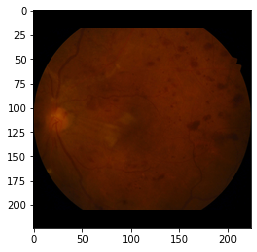

In [92]:
plt.imshow(xtest[0])

In [94]:
data3 = asarray(xtest)
save('IDRID/B. Disease Grading/1. Original Images/xtestidrid.npy', data3)

In [95]:
train_df = pd.read_csv('aptos2019-blindness-detection/test.csv')

In [96]:
train_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
